<a href="https://colab.research.google.com/github/Bruh-failed/homework1/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Pandas

Today we'll practice data exploration in pandas! Each of these cells should consist of a single line of pandas, answering the question.

First, you'll need to download the dataset "Top American Colleges 2022" from Kaggle.com and get it into this directory. You'll need to make an account first.

Below is a list of useful functions. Part of this homework is practicing reading the documentation, so you'll want to look them up as you go. I'd recommend starting with this: https://pandas.pydata.org/docs/user_guide/10min.html. Once you've read that, in general you can find the API for any of these functions by searching their name plus pandas.

List of helpful functions:

* read_csv
* head
* unique
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns)
* isin
* fillna
* astype
* hist

## The Basics

First, read the dataframe in. Store it in a variable called "df".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('top_colleges_2022.csv')

Let's get a feel for our dataframe. Print out a list of columns

Now print out the first ten elements. There's a single function that does it by default.

In [ ]:
print(df.head(10))

                                         description  rank  \
0  A leading global research university, MIT attr...     1   
1  Stanford University sits just outside of Palo ...     2   
2  One of the top public universities in the coun...     2   
3  Princeton is a leading private research univer...     4   
4  Located in upper Manhattan, Columbia Universit...     5   
5  The University of California, Los Angeles is t...     6   
6  Located in rural Williamstown, MA, Williams Co...     7   
7  Yale University is the second oldest Ivy Leagu...     8   
8  Duke offers 53 undergraduate majors at its Dur...     9   
9  Founded by Benjamin Franklin, The University o...    10   

                        organizationName state  studentPopulation  \
0  Massachusetts Institute of Technology    MA              12195   
1                    Stanford University    CA              20961   
2     University of California, Berkeley    CA              45878   
3                   Princeton University 

## Exploration

Now let's learn to do some exploration. Try printing out the median "medianBaseSalary"


In [ ]:
medianBaseSalary = df['medianBaseSalary'].median()
print(medianBaseSalary)

112800.0


Making it a little more complicated--print out the median "medianBaseSalary" only for urban colleges.

In [ ]:
medianBaseSalaryforurban = df.loc[(df['campusSetting'] == 'Urban'), 'medianBaseSalary'].median()
print(medianBaseSalaryforurban)

113100.0


Now, still using one statement, let's print out median "medianBaseSalary" for all different possible values of "campusSetting". You'll need a statement we haven't used yet.

In [ ]:

medianBaseSalaryforurban = df.loc[(df['campusSetting'] == 'Urban'), 'medianBaseSalary'].median()
medianBaseSalaryforsuburban = df.loc[(df['campusSetting'] == 'Suburban'), 'medianBaseSalary'].median()
medianBaseSalaryforrural = df.loc[(df['campusSetting'] == 'Rural'), 'medianBaseSalary'].median()

print(medianBaseSalaryforurban)
print(medianBaseSalaryforsuburban)
print(medianBaseSalaryforrural)

113100.0
113500.0
111450.0


Print out the number of colleges by state. Your results should look something like:

NY    63<br>
CA    55

etc.

In [ ]:
df.groupby('state')['state'].count()

state
AL     5
AR     2
AZ     4
CA    55
CO     7
CT     8
DC     5
DE     1
FL    14
GA     9
HI     2
IA     5
ID     3
IL    16
IN    12
KS     2
KY     4
LA     4
MA    27
MD    12
ME     4
MI    15
MN    12
MO     8
MS     2
MT     2
NC    11
ND     2
NE     3
NH     4
NJ    16
NM     3
NV     2
NY    63
OH    15
OK     3
OR     9
PA    33
PR     1
RI     5
SC     6
SD     2
TN     9
TX    26
UT     4
VA    14
VT     4
WA    13
WI     8
WV     1
WY     1
Name: state, dtype: int64

Display just the line for University of Maryland. (There are a couple of ways of doing this.)

In [16]:
dc = df[df['organizationName'].str.contains('University of Maryland')].iloc[0]
print(dc)



description                The University of Maryland, College Park, is a...
rank                                                                      40
organizationName                        University of Maryland, College Park
state                                                                     MD
studentPopulation                                                      44404
campusSetting                                                       Suburban
medianBaseSalary                                                    124500.0
longitude                                                         -76.937269
latitude                                                           38.980725
website                                                   http://www.umd.edu
phoneNumber                                                   (301) 405-1000
city                                                            College Park
country                                                        United States

## Modifications

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

Start by filling in all blank phone numbers with "no number"



In [ ]:
df["phoneNumber"] = df['phoneNumber'].replace('','no number')

                                          description  rank  \
0   A leading global research university, MIT attr...     1   
1   Stanford University sits just outside of Palo ...     2   
2   One of the top public universities in the coun...     2   
3   Princeton is a leading private research univer...     4   
4   Located in upper Manhattan, Columbia Universit...     5   
5   The University of California, Los Angeles is t...     6   
6   Located in rural Williamstown, MA, Williams Co...     7   
7   Yale University is the second oldest Ivy Leagu...     8   
8   Duke offers 53 undergraduate majors at its Dur...     9   
9   Founded by Benjamin Franklin, The University o...    10   
10  An elite private university, Northwestern prov...    11   
11  Rice is a private research institution in Hous...    12   
12  Vanderbilt University in Nashville, TN, offers...    13   
13  The smallest Ivy League school, Dartmouth Coll...    14   
14  Founded in 1636 in Cambridge, Massachusetts, H...  

Take the website column and change it so that no string includes "http://" or "www"

In [ ]:
df["website"] = df['website'].str.replace('http://','').str.replace('www','')
print(df['website'])

0           web.mit.edu
1         .stanford.edu
2         .berkeley.edu
3        .princeton.edu
4         .columbia.edu
             ...       
493          .sjcny.edu
494       .moravian.edu
495    https://.ltu.edu
496                 NaN
497         .mephis.edu
Name: website, Length: 498, dtype: object


Create a new column called "faculty" that computes the number of faculty at each university

In [ ]:
df['faculty'] = (df['totalStudentPop'] / df['studentFacultyRatio']).round().astype(int)

                                         description  rank  \
0  A leading global research university, MIT attr...     1   
1  Stanford University sits just outside of Palo ...     2   
2  One of the top public universities in the coun...     2   
3  Princeton is a leading private research univer...     4   
4  Located in upper Manhattan, Columbia Universit...     5   
5  The University of California, Los Angeles is t...     6   
6  Located in rural Williamstown, MA, Williams Co...     7   
7  Yale University is the second oldest Ivy Leagu...     8   
8  Duke offers 53 undergraduate majors at its Dur...     9   
9  Founded by Benjamin Franklin, The University o...    10   

                        organizationName state  studentPopulation  \
0  Massachusetts Institute of Technology    MA              12195   
1                    Stanford University    CA              20961   
2     University of California, Berkeley    CA              45878   
3                   Princeton University 

## Graphs

Let's do some very basic graphing here! Create a histogram for the student population.

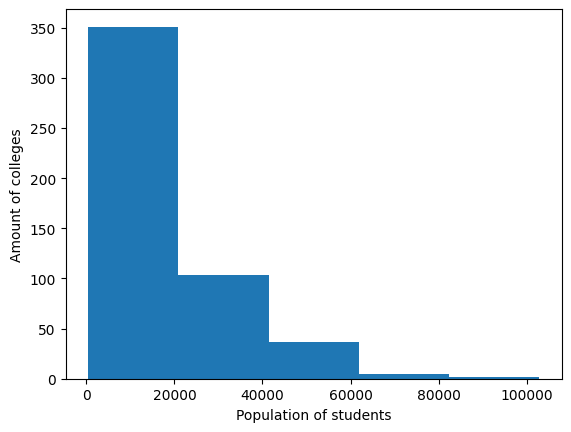

In [ ]:
plt.hist(df['studentPopulation'],bins=5)
plt.xlabel('Population of students')
plt.ylabel('Amount of colleges')
plt.show()